### Loading the Data

In [163]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC

In [164]:
df = None

# Attempting to load a CSV file from a Google Drive link into a Pandas DataFrame.
try:
    # Original URL pointing to Google Drive file shared for viewing.
    url = 'https://drive.google.com/file/d/1xx0EV_nLt9shUSFJ7u5qAeeDrinZRnxf/view?usp=sharing'

    # Extracting file ID from the original URL to construct a direct download link.
    url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

    # Loading the CSV data from the constructed URL into a Pandas DataFrame.
    df = pd.read_csv(url)

    # Confirmation message upon successful loading of CSV data.
    print('Csv and Dataframe loaded.')

except Exception as e:
    # Handling any exceptions that may occur during the process and printing the error message.
    print('Exception occurred: ', str(e))


Csv and Dataframe loaded.


In [165]:
# exploring the dataset
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [166]:
# verifying the rows and columns in the dataset
df.shape

(16734, 19)

In [167]:
# verifying the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

#### Checking for missing values

In [168]:
df.isna().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

Handling of missing values

In [169]:
# Calculating the missing values

for each in df.columns:
    print('Percent of null values', each, ':', (df[each].isnull().mean() * 100).round(2))

Percent of null values Brand : 0.01
Percent of null values Year : 0.01
Percent of null values Model : 0.01
Percent of null values Car/Suv : 0.17
Percent of null values Title : 0.01
Percent of null values UsedOrNew : 0.01
Percent of null values Transmission : 0.01
Percent of null values Engine : 0.01
Percent of null values DriveType : 0.01
Percent of null values FuelType : 0.01
Percent of null values FuelConsumption : 0.01
Percent of null values Kilometres : 0.01
Percent of null values ColourExtInt : 0.01
Percent of null values Location : 2.69
Percent of null values CylindersinEngine : 0.01
Percent of null values BodyType : 1.69
Percent of null values Doors : 9.59
Percent of null values Seats : 10.19
Percent of null values Price : 0.02


In [170]:
# filling missing values 
# small => mean
# large => mode

for column in df.columns:
    if df[column].dtype == 'object':
        # For string columns, fill missing values with mode
        mode_value = df[column].mode().iloc[0]  # Get the mode value as a scalar
        df[column].fillna(mode_value, inplace=True)
    else:
        # For numeric columns, fill missing values with mean
        df[column].fillna(df[column].mean(), inplace=True)

In [171]:
# confirming that missing values does not exist in the dataframe

df.isna().sum()

Brand                0
Year                 0
Model                0
Car/Suv              0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

In [172]:
# Replace specific values in the 'Price' and 'Kilometres' columns of the DataFrame.

# Replace 'POA' (Price on Application) with 0 in the 'Price' column.
df['Price'] = df['Price'].replace('POA', 0)

# Replace '-' (dash) with 0 in the 'Kilometres' column.
df['Kilometres'] = df['Kilometres'].replace('-', 0)


In [173]:
# Convert specified columns to integers, handling errors gracefully.

# Convert 'Kilometres' column to numeric, coercing errors to NaN, filling NaN with 0, and converting to integer.
df['Kilometres'] = pd.to_numeric(df['Kilometres'], errors='coerce').fillna(0).astype(int)

# Convert 'Price' column to numeric, coercing errors to NaN, filling NaN with 0, and converting to integer.
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0).astype(int)

# Verify the data types of 'Kilometres' and 'Price' columns after conversion.
df[['Kilometres', 'Price']].dtypes


Kilometres    int64
Price         int64
dtype: object

In [174]:
# Define functions to calculate quartiles and inter-quartile range (IQR)
def q1(series):
    """Calculate the first quartile (Q1)."""
    return series.quantile(0.25)


def q3(series):
    """Calculate the third quartile (Q3)."""
    return series.quantile(0.75)


def iqr(series):
    """Calculate the interquartile range (IQR)."""
    return q3(series) - q1(series)


def lower_outlier(series):
    """Calculate the lower outlier bound."""
    return (q1(series) - 1.5 * iqr(series)).round(2)


def upper_outlier(series):
    """Calculate the upper outlier bound."""
    return q3(series) + 1.5 * iqr(series)


def data_range(series):
    """Calculate the range of the data."""
    return series.max() - series.min()


def mode(series):
    """Calculate the mode of the data."""
    return series.mode()[0]


# Define a list of calculations to apply to each column
calculations = [
    "min",  # Minimum value
    "max",  # Maximum value
    "count",  # Count of non-null values
    "mean",  # Mean value
    "median",  # Median value
    lambda x: x.mode()[0],  # Mode value
    data_range,  # Range of the data
    q1,  # First quartile (Q1)
    q3,  # Third quartile (Q3)
    iqr,  # Inter-quartile range (IQR)
    "var",  # Sample Variance
    "std",  # Sample Standard deviation
    lower_outlier,  # Lower outlier bound
    upper_outlier  # Upper outlier bound
]

# Apply the calculations to each column in the dataframe (df)
result = df.agg(
    {
        "Price": calculations,  # Apply calculations to the 'Price' column
        "Kilometres": calculations  # Apply calculations to the 'Kilometres' column
    }
)

# Rename the 'mode' and 'range' rows for clarity
result.rename(index={result.index[5]: 'mode'}, inplace=True)  # Rename mode row
result.rename(index={result.index[6]: 'range'}, inplace=True)  # Rename range row
result.rename(index={result.index[-3]: 'variance'}, inplace=True)  # Rename range row
result.rename(index={result.index[-4]: 'standard deviation'}, inplace=True)  # Rename range row


# Define a function to format large numbers
def format_large_numbers(x):
    if abs(x) >= 1e6:
        return f'{x:.2e}'  # Scientific notation for numbers >= 1 million
    else:
        return f'{x:.2f}'  # Normal formatting for smaller numbers


# Apply formatting to each cell in the DataFrame
result = result.applymap(format_large_numbers)

# Display the resulting dataframe
result

,Price,Kilometres
min,0.00,0.00
max,1.50e+06,533849.00
count,16734.00,16734.00
mean,37190.56,96555.00
median,29300.00,82352.00
mode,29990.00,0.00
range,1.50e+06,533849.00
q1,18990.00,34807.00
q3,43990.00,143738.00
iqr,25000.00,108931.00


### Classification Model

In [175]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [176]:
# # Separate features (x) and target (y)
# x = df.drop(columns=['DriveType'])
# y = df['DriveType']

In [177]:
x = df.drop(columns=['DriveType']).columns
', '.join(list(x))
len(x)

18

In [178]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [179]:
df[['Brand', 'Year', 'Transmission', 'Engine', 'FuelType', 'Price', 'CylindersinEngine', 'BodyType']].head()

,Brand,Year,Transmission,Engine,FuelType,Price,CylindersinEngine,BodyType
0,Ssangyong,2022.0,Automatic,"4 cyl, 2.2 L",Diesel,51990,4 cyl,SUV
1,MG,2022.0,Automatic,"4 cyl, 1.5 L",Premium,19990,4 cyl,Hatchback
2,BMW,2022.0,Automatic,"4 cyl, 2 L",Premium,108988,4 cyl,Coupe
3,Mercedes-Benz,2011.0,Automatic,"8 cyl, 5.5 L",Premium,32990,8 cyl,Coupe
4,Renault,2022.0,Automatic,"4 cyl, 1.3 L",Unleaded,34990,4 cyl,SUV


In [180]:
df['Brand'].nunique()

76

In [181]:
df['DriveType'].unique()

array(['AWD', 'Front', 'Rear', 'Other', '4WD'], dtype=object)

In [203]:
def get_x_y(selection="all"):
    _x = None
    _y = df['DriveType']
    if selection == "all":
        _x = df.drop(columns=['DriveType'])
    elif selection == "nine":
        _x = df[['Brand', 'Year', 'Car/Suv', 'Transmission', 'Engine', 'FuelType', 'Price', 'CylindersinEngine',
                 'BodyType']]
    elif selection == "seven":
        _x = df[['Year', 'Transmission', 'Engine', 'FuelType', 'Price', 'CylindersinEngine', 'BodyType']]
    return _x, _y


def preprocess_data(_x):
    """
    Preprocesses input data 'x' using StandardScaler for numerical features and OneHotEncoder for categorical features.

    Parameters:
    x (DataFrame): Input DataFrame containing features to be preprocessed.

    Returns:
    numpy.ndarray: Transformed data after preprocessing.
    """
    numerical_features = ['Year', 'Price']
    categorical_features = list(set(_x) - set(numerical_features))

    # Define transformers
    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(drop='first')

    # Create preprocessor using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    # Return transformed data
    return preprocessor.fit_transform(_x)


# Define classification functions
def train_random_forest(_x_train, _y_train):
    """
    Trains a Random Forest Classifier using the input training data.

    Parameters:
    _x_train (numpy.ndarray): Transformed features training data.
    _y_train (Series): Target training data.

    Returns:
    RandomForestClassifier: Trained Random Forest classifier model.
    """
    clf = RandomForestClassifier(random_state=42)
    clf.fit(_x_train, _y_train)
    return clf


def train_svm(_x_train, _y_train):
    """
    Trains a Support Vector Machine (SVM) Classifier using the input training data.

    Parameters:
    _x_train (numpy.ndarray): Transformed features training data.
    _y_train (Series): Target training data.

    Returns:
    SVC: Trained SVM classifier model.
    """
    clf = SVC(kernel='linear', random_state=42)
    clf.fit(_x_train, _y_train)
    return clf


def evaluate_model(clf, _x_test, _y_test):
    """
    Evaluates the performance of a classifier model using accuracy score on test data.

    Parameters:
    clf: Trained classifier model.
    _x_test (numpy.ndarray): Transformed features test data.
    _y_test (Series): Target test data.

    Returns:
    float: Accuracy score of the model on the test data.
    int: the index of the predicted data.
    """
    y_pred = clf.predict(_x_test)
    accuracy = accuracy_score(_y_test, y_pred)
    return accuracy, y_pred


# Function to plot evaluation results using matplotlib
def plot_evaluation_results(_models, _accuracies):
    """
    Plots bar chart comparing accuracy scores of different classifier models.

    Parameters:
    models (list): List of model names.
    accuracies (list): List of accuracy scores corresponding to each model.
    """
    plt.figure(figsize=(8, 5))
    plt.bar(_models, _accuracies, color=['blue', 'green'])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Classifier Accuracy Comparison')
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy percentage
    plt.grid(True)
    plt.show()


# Function to plot evaluation results using Plotly Express
def plot_evaluation_results_line(_models, _accuracies):
    """
    Plots line chart comparing accuracy scores of different classifier models using Plotly Express.

    Parameters:
    models (list): List of model names.
    accuracies (list): List of accuracy scores corresponding to each model.
    """
    fig = px.line(x=_models, y=_accuracies, title='Classifier Accuracy Comparison',
                  labels={'x': 'Models', 'y': 'Accuracy'})
    fig.show()


results = []


def run_classifiers_model(test_size, _x, _y):
    """
    Runs Random Forest and SVM classifiers on preprocessed data with a specified test size.
    Stores the results in a list and optionally prints accuracy scores.

    Parameters:
    test_size (float): Proportion of the dataset to include in the test split.

    Returns:
    None
    """
    # Split data into train and test sets
    X_processed = preprocess_data(_x)
    X_train, X_test, y_train, y_test = train_test_split(X_processed, _y, test_size=test_size, random_state=42)

    # Train Random Forest and SVM classifiers
    rf_model = train_random_forest(X_train, y_train)
    svm_model = train_svm(X_train, y_train)

    # Evaluate models on the test set
    rf_accuracy, rf_y_pred = evaluate_model(rf_model, X_test, y_test)
    svm_accuracy, svm_y_pred = evaluate_model(svm_model, X_test, y_test)

    rf_mislabeled_count = (y_test.values.ravel() != rf_y_pred).sum()
    svm_mislabeled_count = (y_test.values.ravel() != svm_y_pred).sum()

    test_size_count = X_test.shape[0]

    print(f"Features used for this model are: \n{', '.join(_x.columns)}, \nTarget = {_y.name}\n")
    print(f"Train Size: {(1 - test_size) * 100} and Test Size: {test_size * 100}\n")
    print(
        f"Random Forest Classifier : Number of mislabeled points out of a total {test_size_count} points : {rf_mislabeled_count}")
    print(
        f"SVM Classifier : Number of mislabeled points out of a total {test_size_count} points : {svm_mislabeled_count}")

    # Append results to the global list 'results'
    results.append({
        'FeatureSize': len(_x.columns),
        'TestSize': test_size_count,
        'TestSize(%)': round(test_size * 100, 2),
        'RandomForestAccuracy(%)': round(rf_accuracy * 100, 2),
        'SVMAccuracy(%)': round(svm_accuracy * 100, 2),
        'MislabeledPoints(RF)': rf_mislabeled_count,
        'MislabeledPoints(SVM)': svm_mislabeled_count
    })

    # Plot evaluation results
    models = ['Random Forest', 'SVM']
    accuracies = [rf_accuracy, svm_accuracy]
    plot_evaluation_results(models, accuracies)
    print("\n")

    _best_model = None
    _best_model_name = None
    _best_model_accuracy = 0

    if rf_accuracy > svm_accuracy:
        _best_model_accuracy = rf_accuracy
        _best_model_name = 'Random Forest'
        _best_model = rf_model
    else:
        _best_model_accuracy = svm_accuracy
        _best_model_name = 'Support Vector Machine'
        _best_model = svm_model

    return _best_model, _best_model_name, _best_model_accuracy


In [204]:
best_model = None
best_model_name = None
best_model_accuracy = 0

Features used for this model are: 
Brand, Year, Model, Car/Suv, Title, UsedOrNew, Transmission, Engine, FuelType, FuelConsumption, Kilometres, ColourExtInt, Location, CylindersinEngine, BodyType, Doors, Seats, Price, 
Target = DriveType

Train Size: 70.0 and Test Size: 30.0

Random Forest Classifier : Number of mislabeled points out of a total 5021 points : 314
SVM Classifier : Number of mislabeled points out of a total 5021 points : 308


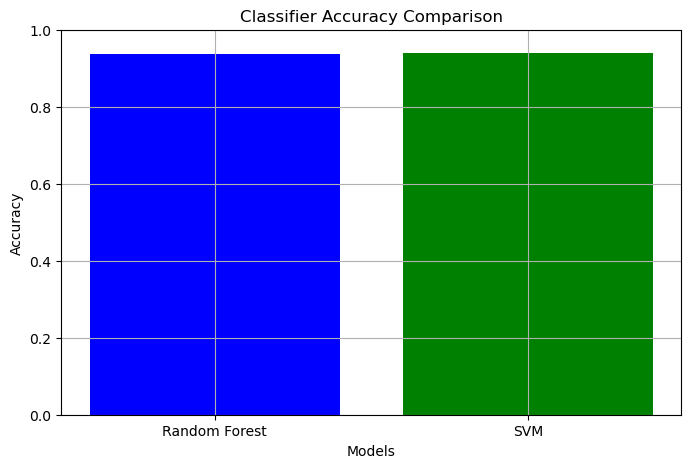



Features used for this model are: 
Brand, Year, Car/Suv, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 70.0 and Test Size: 30.0

Random Forest Classifier : Number of mislabeled points out of a total 5021 points : 527
SVM Classifier : Number of mislabeled points out of a total 5021 points : 752


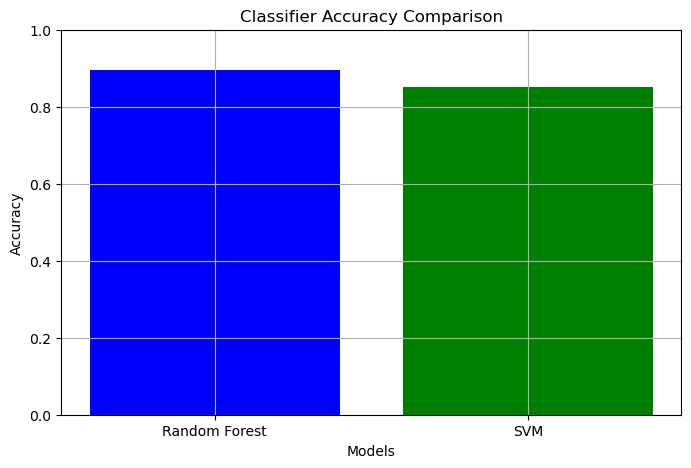



Features used for this model are: 
Year, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 70.0 and Test Size: 30.0

Random Forest Classifier : Number of mislabeled points out of a total 5021 points : 896
SVM Classifier : Number of mislabeled points out of a total 5021 points : 1123


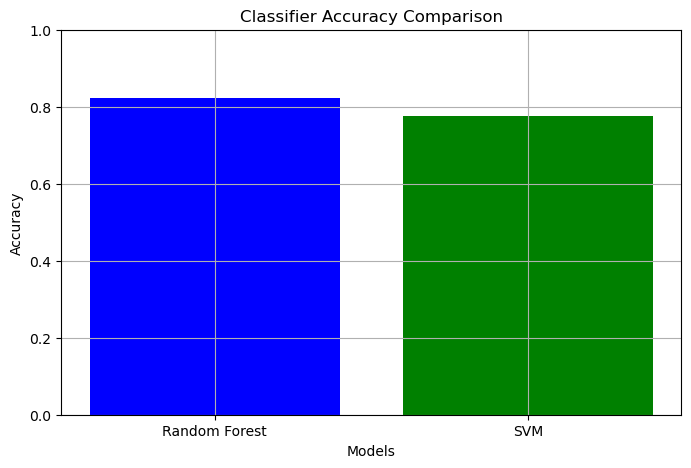



Features used for this model are: 
Brand, Year, Model, Car/Suv, Title, UsedOrNew, Transmission, Engine, FuelType, FuelConsumption, Kilometres, ColourExtInt, Location, CylindersinEngine, BodyType, Doors, Seats, Price, 
Target = DriveType

Train Size: 75.0 and Test Size: 25.0

Random Forest Classifier : Number of mislabeled points out of a total 4184 points : 247
SVM Classifier : Number of mislabeled points out of a total 4184 points : 242


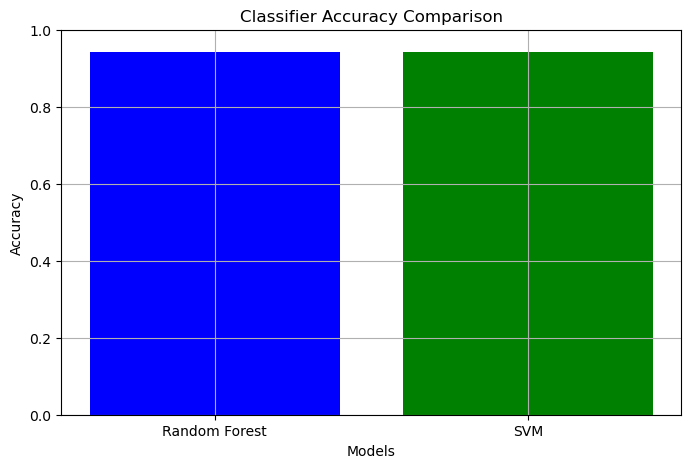



Features used for this model are: 
Brand, Year, Car/Suv, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 75.0 and Test Size: 25.0

Random Forest Classifier : Number of mislabeled points out of a total 4184 points : 437
SVM Classifier : Number of mislabeled points out of a total 4184 points : 631


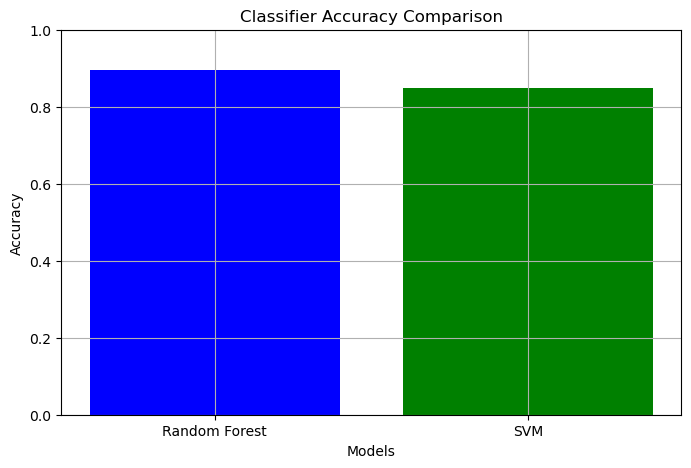



Features used for this model are: 
Year, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 75.0 and Test Size: 25.0

Random Forest Classifier : Number of mislabeled points out of a total 4184 points : 735
SVM Classifier : Number of mislabeled points out of a total 4184 points : 937


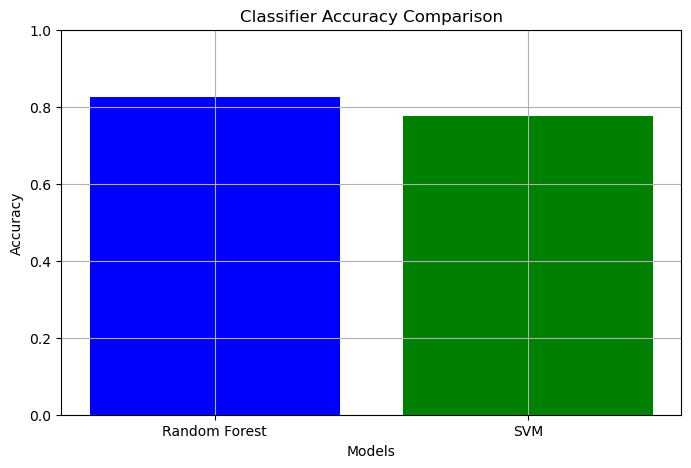



Features used for this model are: 
Brand, Year, Model, Car/Suv, Title, UsedOrNew, Transmission, Engine, FuelType, FuelConsumption, Kilometres, ColourExtInt, Location, CylindersinEngine, BodyType, Doors, Seats, Price, 
Target = DriveType

Train Size: 80.0 and Test Size: 20.0

Random Forest Classifier : Number of mislabeled points out of a total 3347 points : 194
SVM Classifier : Number of mislabeled points out of a total 3347 points : 178


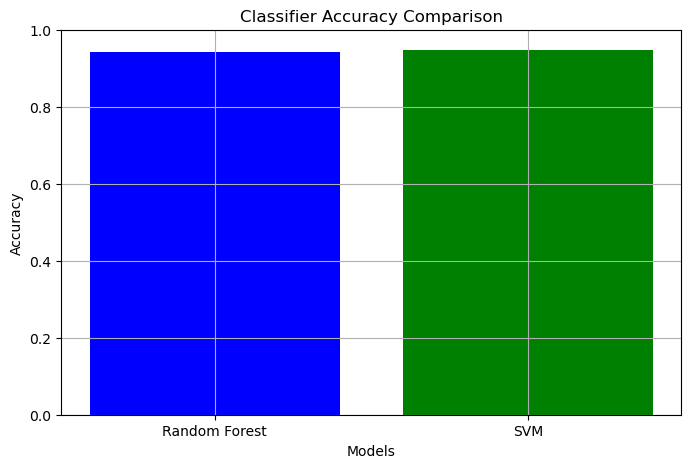



Features used for this model are: 
Brand, Year, Car/Suv, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 80.0 and Test Size: 20.0

Random Forest Classifier : Number of mislabeled points out of a total 3347 points : 350
SVM Classifier : Number of mislabeled points out of a total 3347 points : 493


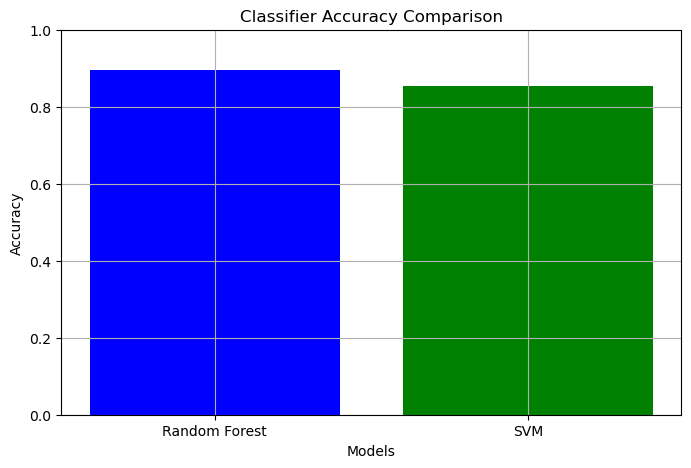



Features used for this model are: 
Year, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 80.0 and Test Size: 20.0

Random Forest Classifier : Number of mislabeled points out of a total 3347 points : 575
SVM Classifier : Number of mislabeled points out of a total 3347 points : 751


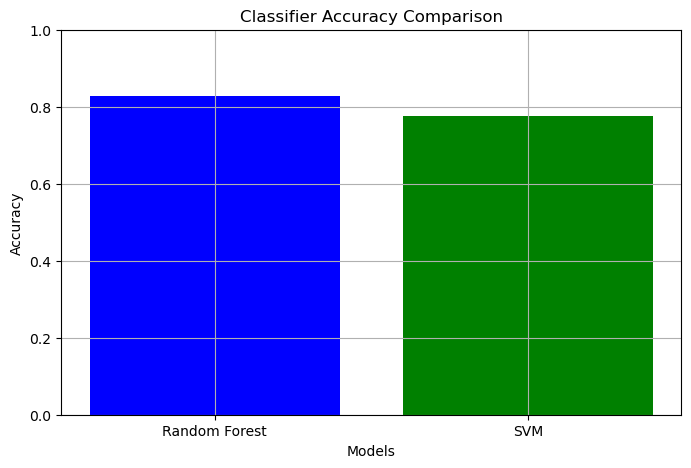



Features used for this model are: 
Brand, Year, Model, Car/Suv, Title, UsedOrNew, Transmission, Engine, FuelType, FuelConsumption, Kilometres, ColourExtInt, Location, CylindersinEngine, BodyType, Doors, Seats, Price, 
Target = DriveType

Train Size: 85.0 and Test Size: 15.0

Random Forest Classifier : Number of mislabeled points out of a total 2511 points : 135
SVM Classifier : Number of mislabeled points out of a total 2511 points : 138


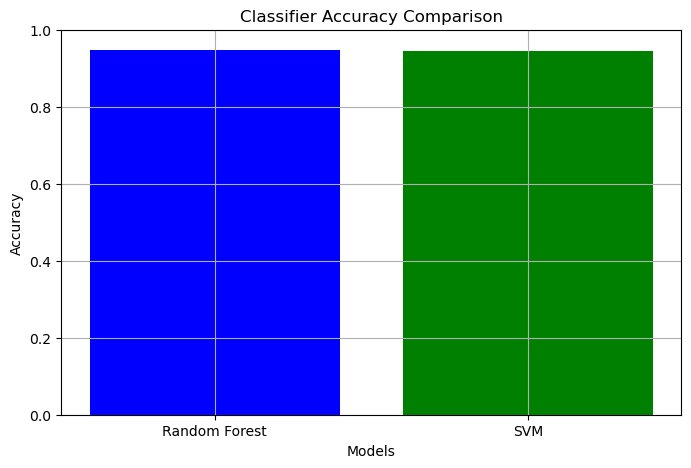



Features used for this model are: 
Brand, Year, Car/Suv, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 85.0 and Test Size: 15.0

Random Forest Classifier : Number of mislabeled points out of a total 2511 points : 255
SVM Classifier : Number of mislabeled points out of a total 2511 points : 384


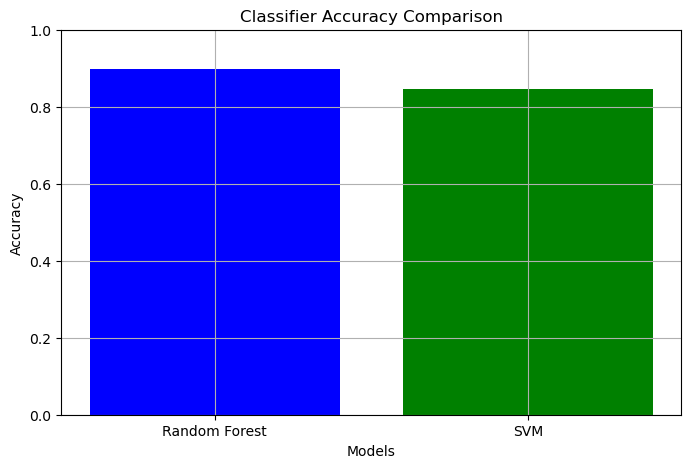



Features used for this model are: 
Year, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 85.0 and Test Size: 15.0

Random Forest Classifier : Number of mislabeled points out of a total 2511 points : 431
SVM Classifier : Number of mislabeled points out of a total 2511 points : 559


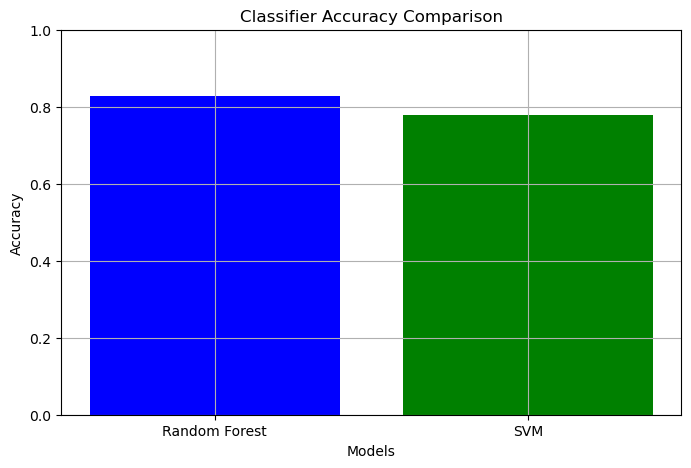

In [205]:
# Loop through different test sizes and different feature size and run the classifiers
test_sizes = [0.3, 0.25, 0.2, 0.15]
feature_sizes = ["all", "nine", "seven"]

for t_size in test_sizes:
    for f_size in feature_sizes:
        x, y = get_x_y(f_size)
        _b_model, _b_model_name, _b_model_accuracy = run_classifiers_model(t_size, x, y)

        # if _b_model_accuracy > best_model_accuracy:
        #     best_model_accuracy = _b_model_accuracy
        #     best_model_name = _b_model_name
        #     best_model = _b_model

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

In [206]:
print("Results DataFrame:")
results_df

Results DataFrame:


,FeatureSize,TestSize,TestSize(%),RandomForestAccuracy(%),SVMAccuracy(%),MislabeledPoints(RF),MislabeledPoints(SVM)
0,18,5021,30.0,93.75,93.87,314,308
1,9,5021,30.0,89.50,85.02,527,752
2,7,5021,30.0,82.15,77.63,896,1123
3,18,4184,25.0,94.10,94.22,247,242
4,9,4184,25.0,89.56,84.92,437,631
5,7,4184,25.0,82.43,77.61,735,937
6,18,3347,20.0,94.20,94.68,194,178
7,9,3347,20.0,89.54,85.27,350,493
8,7,3347,20.0,82.82,77.56,575,751
9,18,2511,15.0,94.62,94.50,135,138
